Sampling frequency =  48000 
Shape of data array =  (654336,)
Max Value is 3786


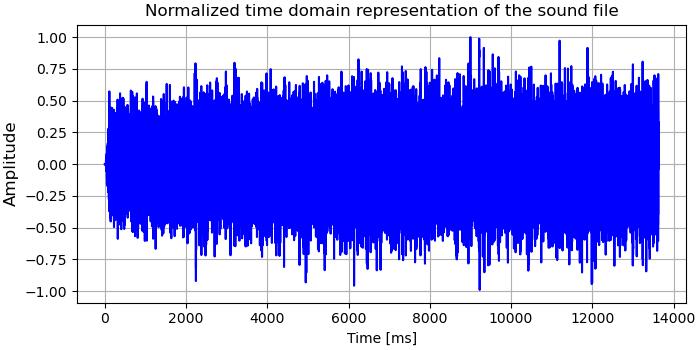

Frequency with highest FFT magnitude: 120.01173708920187 Hz


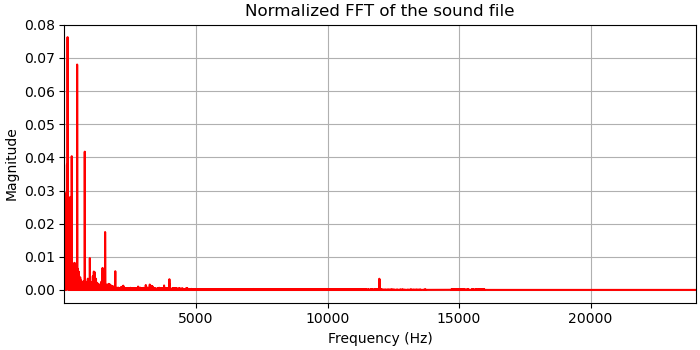

In [1]:
from scipy.io import wavfile  # import library for reading sound files
import numpy as np  # import numpy to do the fft
import matplotlib.pyplot as plt
import os
from scipy.fft import fft, fftfreq
from scipy.signal import butter, filtfilt

%matplotlib ipympl

def bandpass_filter(data, sample_rate, lowcut, highcut, order=5):
    nyquist = 0.5 * sample_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype = 'band')
    filtered_data = filtfilt(b, a, data )
    return filtered_data

figure_width = 7  # inches
figure_height = 3.5  # inches

WAV_DATA = 'sample.wav'
PATH = os.getcwd()  # Save the plots in current working directory
# Load the file -get sampling_frequency and the data array
sample_rate, data = wavfile.read(WAV_DATA)
length = data.shape[0] / sample_rate
print("Sampling frequency = ", sample_rate, "\nShape of data array = ", data.shape)

# Determine the maximum values
max_value = np.max(np.abs(data))
print(f'Max Value is {max_value}')
# Use max_value and normalize sound data to get values between -1 & +1
data_norm = data/max_value
# Lets just take a single audio channel (mono) even if it is stereo
if len(data.shape) == 1:
	s1 = data_norm
else:
	s1 = data_norm[:, 0]

# Get time domain representation of the sound pressure waves
timeArray = np.arange(0, s1.shape[0], 1.0)
timeArray = timeArray / sample_rate  # Second
timeArray = timeArray * 1000  # Scale to milliseconds

# =============== Plot the sound signal in time domain ================
plt.figure(figsize=(figure_width, figure_height),constrained_layout=True)
plt.plot(timeArray, data_norm, color='b')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude', fontsize=12)
plt.grid()
#plt.tight_layout()
plt.title('Normalized time domain representation of the sound file')
#plt.savefig(os.path.join(PATH, 'signal.png'), dpi=300)
plt.show()

# ================ Fast Fourier Transform ==============================
# Calculate length of the signal
N = len(s1)
Time_period = 1/sample_rate

#yf = fft(data)
yf = fft(s1)  # Perform the Fourier transform
xf = fftfreq(N, Time_period)[:N//2]  # calculate the frequencies in the center of each bin

# Calculate the magnitude of the FFT result
magnitude = np.abs(yf)
# Find the index of the maximum magnitude
max_magnitude_index = np.argmax(magnitude)

# Calculate corresponding frequency with respect to index & sampling rate
max_frequency = max_magnitude_index * sample_rate / len(s1)
print("Frequency with highest FFT magnitude:", max_frequency, "Hz")

# ===========================Frequency domain plot ======================
plt.figure(figsize=(figure_width, figure_height),constrained_layout=True)
# Typically only the FFT corresponding to positive frequencies is plotted
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), color='r')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(1, sample_rate/2)
#plt.xscale('log')
plt.grid()
plt.title('Normalized FFT of the sound file')
#plt.tight_layout()
#plt.savefig(os.path.join(PATH, 'FFT.png'), dpi=300)
plt.show()

# Filter data and save it as new *.wav file 
filtered_data = bandpass_filter(data, sample_rate, lowcut=10000, highcut=20000)
filtered_data = np.asarray(filtered_data, dtype=np.int16)
wavfile.write('filtered_file.wav', sample_rate, filtered_data)